In [2]:
library(ggplot2)
library(tidyverse)
library(magrittr)
library(igraph)

In [6]:
df_25 <- read.csv("conf//conf_1000n_2kmin_2.5gamma_40mean.csv")

# ggplot(df_25, aes(x = alpha, y = g_ratio, col = type)) + geom_point() + geom_line() +
#     geom_linerange(aes(x = alpha, ymin = g_ratio - g_ratio_sd, ymax = g_ratio + g_ratio_sd,
#         col = type), position = position_dodge(0.05)) + ylim(0, 1) + labs(x = expression(paste("Parameter ",
#     alpha)), y = "G ratio", col = "Attack protocol", title = expression(paste("Configuration model ",
#     gamma, "=2.5"))) + theme_bw()

In [7]:
df_3<-read.csv('conf//conf_1000n_2kmin_3gamma_40mean.csv')

# ggplot(df_3, aes(x = alpha, y = g_ratio, col = type)) + geom_point() + geom_line() +
#     geom_linerange(aes(x = alpha, ymin = g_ratio - g_ratio_sd, ymax = g_ratio + g_ratio_sd,
#         col = type), position = position_dodge(0.05)) + ylim(0, 1) + labs(x = expression(paste("Parameter ",
#     alpha)), y='G ratio', col='Attack protocol', title=expression(paste('Configuration model ', gamma,'=3')))+theme_bw()

In [8]:
df_28<-read.csv('conf//conf_1000n_2kmin_2.8gamma_40mean.csv')

# ggplot(df_28, aes(x = alpha, y = g_ratio, col = type)) + geom_point() + geom_line() +
#     geom_linerange(aes(x = alpha, ymin = g_ratio - g_ratio_sd, ymax = g_ratio + g_ratio_sd,
#         col = type), position = position_dodge(0.05)) + ylim(0, 1) + labs(x = expression(paste("Parameter ",
#     alpha)), y='G ratio', col='Attack protocol', title=expression(paste('Configuration model ', gamma,'=3')))+theme_bw()

In [92]:
df_31<-read.csv('conf//conf_1000n_2kmin_3.1gamma_40mean.csv')


In [93]:
df_25 %<>% mutate(gamma='2.5')
df_28 %<>% mutate(gamma='2.8')
df_3 %<>%mutate(gamma='3')
df_31 %<>%mutate(gamma='3.1')

In [94]:
df<-rbind(df_25, df_28, df_3, df_31)

Warning message in geom_line(aes(col = type, shape = gamma), linewidth = 0.7, linetype = 5):
“Ignoring unknown aesthetics: shape”
Warning message:
“Removed 67 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 67 rows containing missing values (`geom_segment()`).”


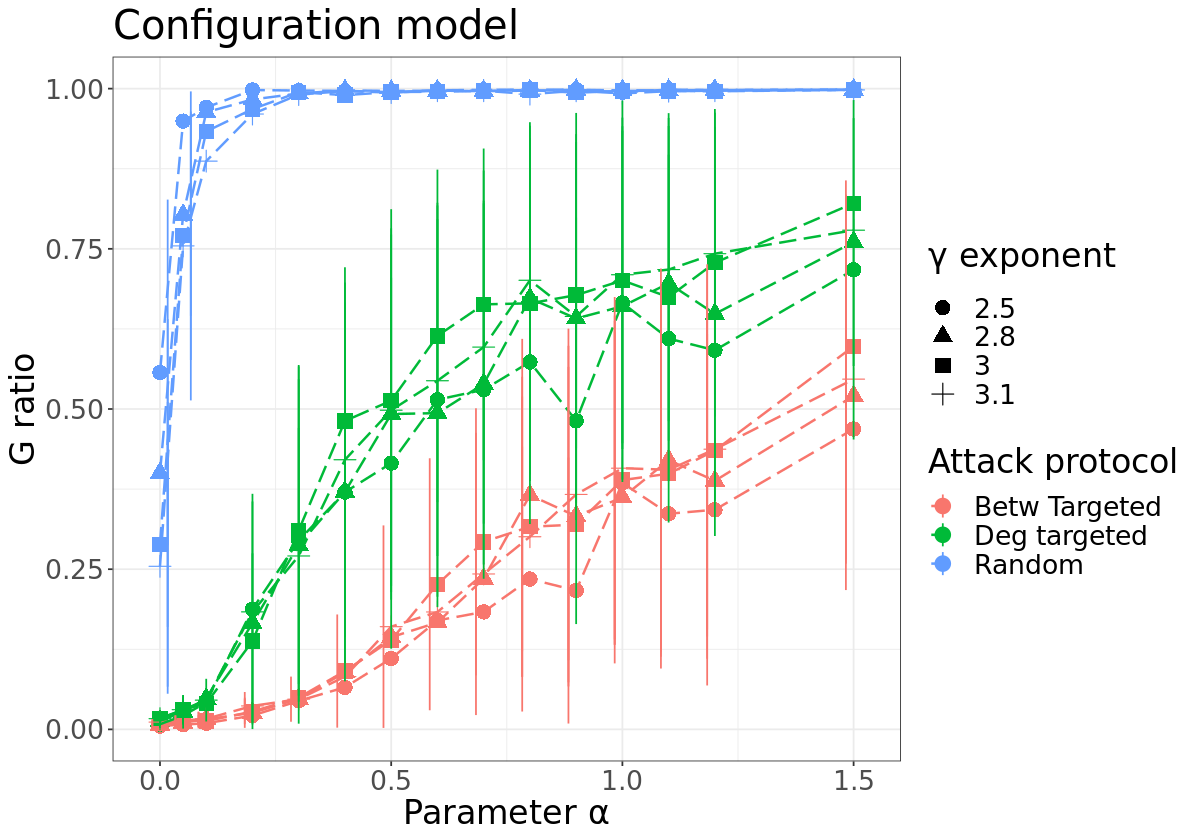

In [95]:
options(repr.plot.width = 10, repr.plot.height = 7)
configuration <- ggplot(df, aes(x = alpha,
                                y = g_ratio)) +
geom_point(aes(col = type,
               shape = gamma),
           size = 4) +
geom_line(aes(col = type,
              shape = gamma),
          linewidth = 0.7,
          linetype=5) +
geom_linerange(aes(ymin = g_ratio - g_ratio_sd,
                   ymax = g_ratio + g_ratio_sd,
                   col = type),
               position = position_dodge(0.05)) +
ylim(0, 1) +
labs(x = expression(paste("Parameter ", alpha)),
     y = "G ratio",
     col = "Attack protocol",
     title = "Configuration model ",
     shape = expression(paste(gamma, " exponent"))) + 
theme_bw() +
theme(text = element_text(size = 20))

configuration

ggsave(configuration, filename = "configuration_model.pdf", width = 10, height = 7,
    scale = 0.75)

# analysis on the kind of network

In [96]:
n <- 1000
k_min <- 2
k_max <- n
gamma <- 3
weights_25 <- (k_min:k_max)^(-2.5)
weights_28 <- (k_min:k_max)^(-2.8)
weights_3 <- (k_min:k_max)^(-3)
weights_31 <- (k_min:k_max)^(-3.1)

In [97]:
degseq <- function(n, k_min, k_max, weights) {
    degs <- sample(c(k_min:k_max), size = n, replace = TRUE, prob = weights)
    if (sum(degs) %% 2 == 1) {
        degs[1] <- degs[1] + 1
    }
    g <- igraph::sample_degseq(out.deg = degs, method = "vl")
    return(g)
}

In [98]:
dd_25 <- vector()
dd_28 <- vector()
dd_3 <- vector()
dd_31 <- vector()

for (i in 1:1000) {
    g <- degseq(n, k_min, k_max, weights_25)
    dd_25[i] <- mean(degree(g))
}
for (i in 1:1000) {
    g <- degseq(n, k_min, k_max, weights_28)
    dd_28[i] <- mean(degree(g))
}
for (i in 1:1000) {
    g <- degseq(n, k_min, k_max, weights_3)
    dd_3[i] <- mean(degree(g))
}
for (i in 1:1000) {
    g <- degseq(n, k_min, k_max, weights_31)
    dd_31[i] <- mean(degree(g))
}

In [109]:
d_25<-as.data.frame(dd_25)
d_25['gamma']<-'2.5'
d_28<-as.data.frame(dd_28)
d_28['gamma']<-'2.8'
d_3<-as.data.frame(dd_3)
d_3['gamma']<-'3'
d_31<-as.data.frame(dd_31)
d_31['gamma']<-'3.1'
colnames(d_31)<-c('deg', 'gamma')
colnames(d_3)<-c('deg', 'gamma')
colnames(d_25)<-c('deg', 'gamma')
colnames(d_28)<-c('deg', 'gamma')

In [110]:
dd<-rbind(d_25, d_28, d_3, d_31)

Warning message in geom_density(data = dd, alpha = 0.6, aes(x = deg, fill = gamma, :
“Ignoring unknown parameters: `binwidth`”


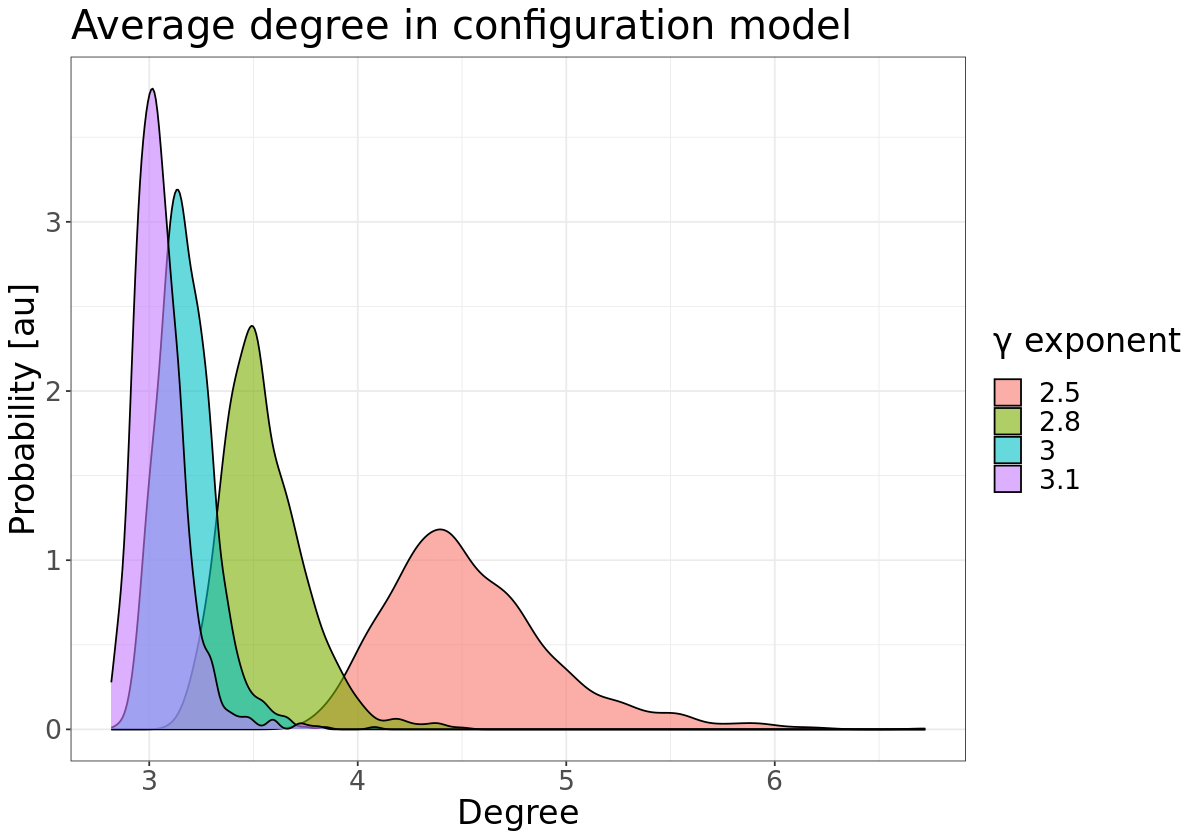

In [135]:
deg_distrib <- ggplot(dd) +
geom_density(data = dd,
             alpha = 0.6,
             aes(x = deg,
                 fill = gamma,
                 y = stat(density)), 
             binwidth = 0.06) +
theme_bw() +
labs(x = "Degree",
     y = "Probability [au]",
     fill = expression(paste(gamma, " exponent")), 
     title = "Average degree in configuration model") +
theme(text = element_text(size = 20))

deg_distrib
ggsave(plot = deg_distrib, filename = "degree_distrib_conf.pdf", width = 10, height = 7,
    scale = 0.75)

In [13]:
deg_graph<-degree(g)
fit_res<-fit_power_law(deg_graph, xmin = 1)
f <- function(g, x) {
    function(x) {
        x^-g
    }
}
f2<-f(2)
f3<-f(3)
f_c<-f(fit_res$alpha)
deg_dist<-degree_distribution(g)

In [14]:
pdf("conf_28gamma_2kmin_1000n.pdf",width=14, height = 10) 
# par(cex.lab = 1.5, cex.axis = 1.5)
layout.matrix <- matrix(c(1, 1, 1, 1, 2, 0), nrow = 2, ncol = 3)
lay_plots <- layout(mat = layout.matrix)

x_min <- 1
x_max <- 100
# options(repr.plot.width = 14, repr.plot.height = 7)
par(cex.axis = 2.5, cex.lab = 2.5, cex.main = 1, oma=c(2,2,2,2), mar=c(6,6,4,4))
plot(1:19, deg_dist[2:20], xlab = "Degree k", ylab = "Prob(k)", pch = 16, cex = 2.3,
    xlim = c(1, 30), log = "xy")
curve(f_c, from = x_min, to = x_max, add = T, log = "xy", col = "red", lwd = 3)
curve(f2, from = x_min, to = x_max, add = T, log = "xy", col = "blue", lwd = 3)
curve(f3, from = x_min, to = x_max, add = T, log = "xy", col = "darkgreen", lwd = 3)
grid()
legend("bottomleft", legend = c(paste("Fit pwr law:", round(fit_res$alpha,2)), "gamma=2", "gamma=3"), col = c("red",
    "blue", "darkgreen"), lty = 1, lwd = 3, cex = 3, title = 'loglog plot')

plot(deg_dist, xlab = "Degree k", ylab = "log(prob(k))", pch = 16,
    cex = 1.3, xlim = c(1, 22))
lines(deg_dist)
# abline(a = linear_model$coefficients[[1]], b = linear_model$coefficients[[2]])
grid()
legend('topright', legend=c('Dist of k'), lwd=2, lty=1, cex=2)
dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“3 y values <= 0 omitted from logarithmic plot”


png 
  2

In [15]:
V(g)$cst_ids<-1:length(g)
V(g)$load <- betweenness(g, v = V(g), directed = FALSE)
V(g)$capacity <- (1 + 1.5) * V(g)$load
overloaded <- sample(order(V(g)$load, decreasing = TRUE)[1:3])

dead_nodes <- overloaded
g_or <- g

while (length(overloaded) > 0) {
    g_or <- delete_vertices(g_or, overloaded)
    V(g_or)$load <- betweenness(g_or, v = V(g_or), directed = FALSE)
    overloaded <- as.vector(V(g_or)[load > capacity])
    orig_idx <- V(g_or)[overloaded]$cst_ids
    dead_nodes <- c(dead_nodes, orig_idx)
}


n_prime <- max(components(g_or)$csize)
n_orig <- max(components(g)$csize)

In [16]:
n_orig

[1] 1000

In [17]:
colors<-rep('#0000FF', max(components(g)$csize))

In [18]:
lcc_survived<-V(g_or)$cst_ids[components(g_or)$membership==which.max(components(g_or)$csize)]

In [19]:
colors[lcc_survived]<-'#FF0000'

In [20]:
lay<-layout_with_fr(g)

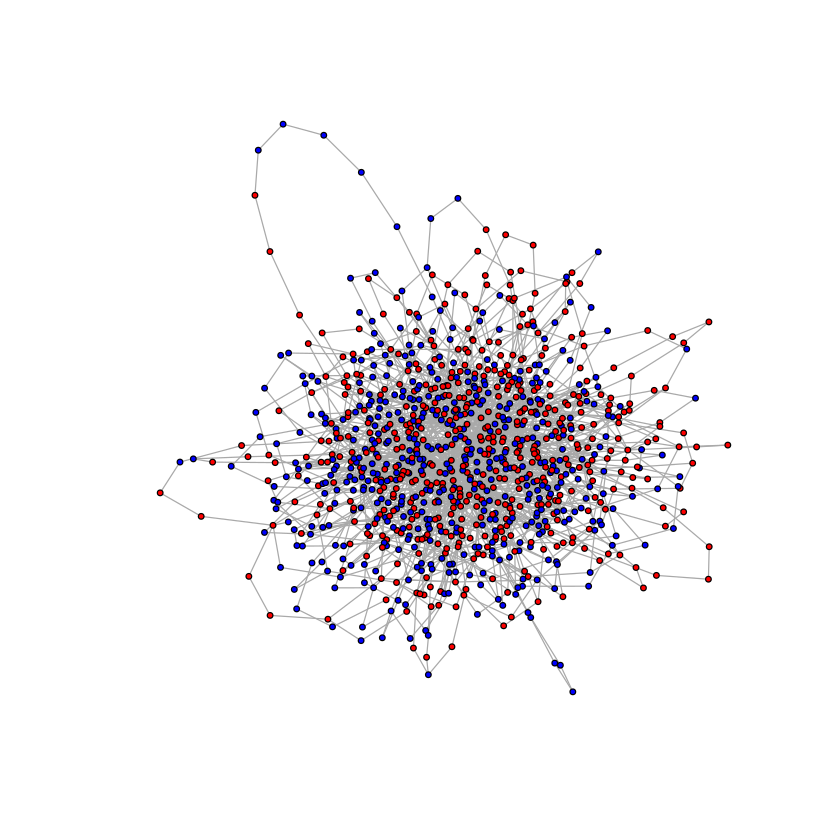

In [21]:
plot(g, vertex.size=2, vertex.label=NA, layout=lay, vertex.color=colors)

In [22]:
g<-subgraph(g,lcc_survived )

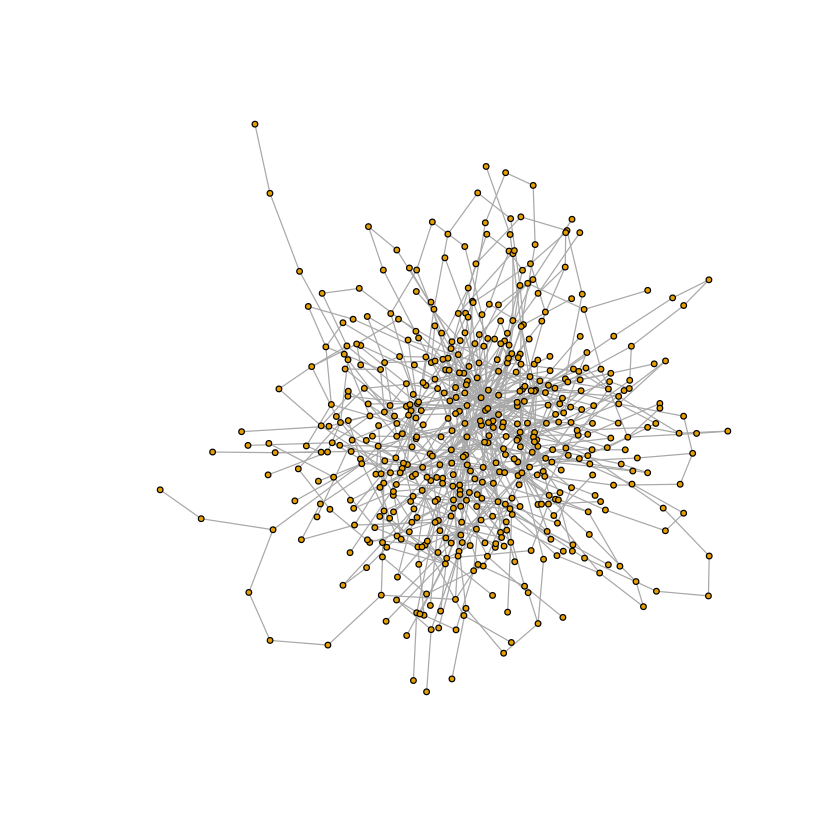

In [23]:
plot(g, vertex.size=2, vertex.label=NA, layout=lay[lcc_survived,])

In [24]:
mean(degree(g))

[1] 2.728324

# alternative configuration model

In [25]:
df<-read.csv('conf/conf_10000_keep_lcc_10means_3gamma_1kmin.csv')

Warning message:
“Removed 5 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_segment()`).”


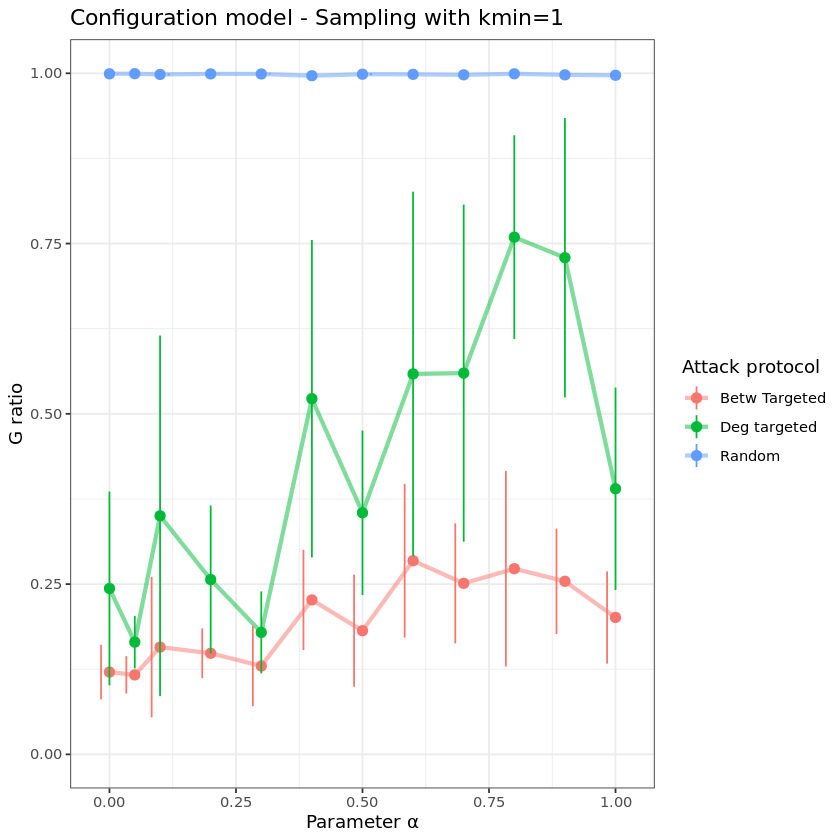

In [26]:
configuration <- ggplot(df, aes(x = alpha, y = g_ratio)) + geom_point(aes(col = type),
    size = 2.5) + geom_line(aes(col = type), alpha = 0.5, linewidth = 1.2) + geom_linerange(aes(ymin = g_ratio -
    g_ratio_sd, ymax = g_ratio + g_ratio_sd, col = type), position = position_dodge(0.05)) +
    ylim(0, 1) + labs(x = expression(paste("Parameter ", alpha)), y = "G ratio",
    col = "Attack protocol", title = "Configuration model - Sampling with kmin=1 ",
    shape = expression(paste(gamma, " exponent"))) + theme_bw()

configuration
ggsave(configuration, filename = "configuration_model_alternative.pdf", width = 10,
    height = 7, scale = 0.75)